In [108]:
import pandas as pd

In [109]:
passengers_data = pd.read_csv("train_passengers_500plus.csv")
passengers_data.head() 

,PassengerID,Name,Age,Gender,TrainNo,Source,Destination,Class,TicketPrice,BookingDate,TravelDate,PaymentMode,BookingStatus
0,1,Ankit,36,Male,12142,Mumbai,Pune,SL,2568,2024-02-27,2024-02-29,Cash,Confirmed
1,2,Priya,34,Male,12574,Varanasi,Pune,1A,1052,2024-01-16,2024-01-22,Cash,Cancelled
2,3,Amit,25,Female,12348,Lucknow,Patna,3A,3277,2024-05-22,2024-07-13,NetBanking,Confirmed
3,4,Rahul,50,Female,12618,Lucknow,Delhi,1A,2346,2024-02-17,2024-03-13,UPI,WL
4,5,Ankit,51,Male,12721,Mumbai,Delhi,3A,3316,2024-02-10,2024-03-17,NetBanking,Confirmed


## **�** A. Data Understanding

In [110]:
#Total Numbers of Passengers

print(f"Total Numbers of Passengers present in the dataset : {passengers_data['PassengerID'].count()}")

Total Numbers of Passengers present in the dataset : 520


In [111]:
#Total numbers of columns in the Dataset

print(f"Total Numbers of columns in the Dataset : {passengers_data.columns} ")


Total Numbers of columns in the Dataset : Index(['PassengerID', 'Name', 'Age', 'Gender', 'TrainNo', 'Source',
       'Destination', 'Class', 'TicketPrice', 'BookingDate', 'TravelDate',
       'PaymentMode', 'BookingStatus'],
      dtype='object') 


In [112]:
#Data type of the Data set

passengers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PassengerID    520 non-null    int64 
 1   Name           520 non-null    object
 2   Age            520 non-null    int64 
 3   Gender         520 non-null    object
 4   TrainNo        520 non-null    int64 
 5   Source         520 non-null    object
 6   Destination    520 non-null    object
 7   Class          520 non-null    object
 8   TicketPrice    520 non-null    int64 
 9   BookingDate    520 non-null    object
 10  TravelDate     520 non-null    object
 11  PaymentMode    520 non-null    object
 12  BookingStatus  520 non-null    object
dtypes: int64(4), object(9)
memory usage: 52.9+ KB



# � B. Data Cleaning bold text

In [113]:
#Missing values in the Data set columns wise

print(f"The total missing values in each columns are : \n{passengers_data.isna().sum()}")

The total missing values in each columns are : 
PassengerID      0
Name             0
Age              0
Gender           0
TrainNo          0
Source           0
Destination      0
Class            0
TicketPrice      0
BookingDate      0
TravelDate       0
PaymentMode      0
BookingStatus    0
dtype: int64


In [114]:
#Handaling the missing values(if any)

passengers_data.dropna().head()

,PassengerID,Name,Age,Gender,TrainNo,Source,Destination,Class,TicketPrice,BookingDate,TravelDate,PaymentMode,BookingStatus
0,1,Ankit,36,Male,12142,Mumbai,Pune,SL,2568,2024-02-27,2024-02-29,Cash,Confirmed
1,2,Priya,34,Male,12574,Varanasi,Pune,1A,1052,2024-01-16,2024-01-22,Cash,Cancelled
2,3,Amit,25,Female,12348,Lucknow,Patna,3A,3277,2024-05-22,2024-07-13,NetBanking,Confirmed
3,4,Rahul,50,Female,12618,Lucknow,Delhi,1A,2346,2024-02-17,2024-03-13,UPI,WL
4,5,Ankit,51,Male,12721,Mumbai,Delhi,3A,3316,2024-02-10,2024-03-17,NetBanking,Confirmed


In [115]:
#Identifying The duplicate passengers in the Dataset

print(f"Total duplicate passengers in the Dataset :{passengers_data.duplicated().sum()} ")

Total duplicate passengers in the Dataset :0 


In [116]:
#converting to the dataset into datetime

passengers_data['BookingDate'] = pd.to_datetime(passengers_data['BookingDate'] , format='mixed', dayfirst=True)
passengers_data['	TravelDate'] = pd.to_datetime(passengers_data['TravelDate'] , format='mixed', dayfirst=True)

In [117]:
#Converting data to standard format(city)

passengers_data["Source"] = passengers_data["Source"].str.strip().str.title()



In [118]:
#Converting data to standard format(city)

passengers_data["Gender"] = passengers_data["Gender"].str.strip().str.lower()

passengers_data["Gender"] = passengers_data["Gender"].replace({
    "m": "Male",
    "male": "Male",
    "f": "Female",
    "female": "Female"
})



# � C. Basic Passenger Analysis

In [119]:
#Finding Average age of passengers.

print(f"Average age of passengers = {round(passengers_data['Age'].mean())}")

Average age of passengers = 43


In [120]:
#Calculating Total numbers of male and female passengers

passengers_data["Gender"].value_counts()

Gender
Male      262
Female    258
Name: count, dtype: int64

In [121]:
#Finding Maximum and Minimum age of the passengers

print(f"The passenger with maximum age = {passengers_data['Age'].max()}")
print(f"The passenger with minimum age = {passengers_data['Age'].min()}")

The passenger with maximum age = 80
The passenger with minimum age = 5



# � D. Train & Route Analysis

In [122]:
#Train which is carrying most passengers

confirmed = passengers_data[passengers_data["BookingStatus"] == "Confirmed"]

train_counts = confirmed["TrainNo"].value_counts()

top_train = train_counts.idxmax()
top_count = train_counts.max()

print(f"Train {top_train} is carrying most of {top_count} passengers")



Train 12677 is carrying most of 2 passengers


In [123]:
#Most expensive train

train_avg_fare = passengers_data.groupby("TrainNo")["TicketPrice"].mean()

print(
    f"Train {train_avg_fare.idxmax()} is the most expensive on average "
    f"with an average ticket price of {train_avg_fare.max():.2f}."
)

Train 12101 is the most expensive on average with an average ticket price of 3483.00.


In [124]:
#Ranking top 5 Source in the Dataset

confirmed = passengers_data[passengers_data["Source"] == "Confirmed"]

top_Source = confirmed["Source"].value_counts().head(5)

for city, count in top_Source.items():
    print(f"{city}: {count} confirmed passengers")

In [125]:
#Ranking top 5 Destinations in the Dataset

confirmed = passengers_data[passengers_data["Destination"] == "Confirmed"]

top_Destination = confirmed["Destination"].value_counts().head(5)

for city, count in top_Destination.items():
    print(f"{city}: {count} confirmed passengers")


In [126]:
#Most traveled Route
passengers_data.groupby(["Source", "Destination"]).size().sort_values(ascending=False).head()


Source    Destination
Varanasi  Pune           11
Chennai   Lucknow         9
Delhi     Patna           9
          Varanasi        9
Jaipur    Jaipur          9
dtype: int64

# **� E. Class Analysis (IMPORTANT 💰)**

In [127]:
# Class-wise passenger count.

passengers_data.groupby('Class' , as_index=False)['PassengerID'].count()

,Class,PassengerID
0,1A,129
1,2A,133
2,3A,135
3,SL,123


In [128]:
#class-wise average ticket price

round(passengers_data.groupby('Class' , as_index=False)['TicketPrice'].mean())

,Class,TicketPrice
0,1A,1812.0
1,2A,1802.0
2,3A,1946.0
3,SL,1858.0


In [129]:
#Higest revenue generating class

passengers_data.groupby("Class")["TicketPrice"].sum().sort_values(ascending=False).head()


Class
3A    262710
2A    239677
1A    233695
SL    228475
Name: TicketPrice, dtype: int64

In [130]:
passengers_data.head()

,PassengerID,Name,Age,Gender,TrainNo,Source,Destination,Class,TicketPrice,BookingDate,TravelDate,PaymentMode,BookingStatus,\tTravelDate
0,1,Ankit,36,Male,12142,Mumbai,Pune,SL,2568,2024-02-27,2024-02-29,Cash,Confirmed,2024-02-29
1,2,Priya,34,Male,12574,Varanasi,Pune,1A,1052,2024-01-16,2024-01-22,Cash,Cancelled,2024-01-22
2,3,Amit,25,Female,12348,Lucknow,Patna,3A,3277,2024-05-22,2024-07-13,NetBanking,Confirmed,2024-07-13
3,4,Rahul,50,Female,12618,Lucknow,Delhi,1A,2346,2024-02-17,2024-03-13,UPI,WL,2024-03-13
4,5,Ankit,51,Male,12721,Mumbai,Delhi,3A,3316,2024-02-10,2024-03-17,NetBanking,Confirmed,2024-03-17


#🔹 F. Revenue Analysis 

Total revenue calculate karo.

In [131]:
#calculating the Total revenue

confirmed = passengers_data[passengers_data["BookingStatus"] == "Confirmed"]
print(f"The Total revenue = {confirmed['TicketPrice'].sum()}")


The Total revenue = 317200


In [132]:
#calculating the Total revenue Train-wise

confirmed = passengers_data[passengers_data["BookingStatus"] == "Confirmed"]
confirmed.groupby('TrainNo', as_index=False)['TicketPrice'].sum().head()

,TrainNo,TicketPrice
0,12025,2895
1,12046,1634
2,12051,1801
3,12062,650
4,12065,2560


In [133]:
#calculating the Total revenue Route-wise

confirmed = passengers_data[passengers_data["BookingStatus"] == "Confirmed"]
route_revenue = (
    confirmed.groupby(["Source", "Destination"])["TicketPrice"].sum().reset_index().sort_values("TicketPrice", ascending=False)).head()
route_revenue

,Source,Destination,TicketPrice
29,Jaipur,Jaipur,11489
83,Varanasi,Lucknow,10606
66,Patna,Lucknow,10474
70,Patna,Varanasi,10030
82,Varanasi,Kolkata,8351


In [134]:
#Top 3 Revenue genrating Trains

confirmed = passengers_data[passengers_data["BookingStatus"] == "Confirmed"]
train_revenue = (
    confirmed.groupby("TrainNo")["TicketPrice"]
      .sum()
      .reset_index()
      .rename(columns={"TicketPrice": "TotalRevenue"})
      .sort_values("TotalRevenue", ascending=False)
)
train_revenue.head(3)

,TrainNo,TotalRevenue
8,12095,5126
121,12677,4714
48,12312,4487


🔹 G. Booking & Payment Analysis

In [135]:
#payment method used by the passengers

payment_dist = passengers_data["PaymentMode"].value_counts()
print(payment_dist)


PaymentMode
Cash          143
Card          138
UPI           123
NetBanking    116
Name: count, dtype: int64


In [136]:
#Most used payment method

most_popular_payment = passengers_data["PaymentMode"].value_counts().idxmax()
print("Most Popular Payment Method:", most_popular_payment)


Most Popular Payment Method: Cash


In [137]:
#Confirmend Vs Cancelled Bookings

booking_counts = passengers_data["BookingStatus"].value_counts()

confirmed_pct = (booking_counts.get("Confirmed", 0) / len(passengers_data)) * 100
cancelled_pct = (booking_counts.get("Cancelled", 0) / len(passengers_data)) * 100

print(f"Confirmed Booking %: {confirmed_pct:.2f}%")
print(f"Cancelled Booking %: {cancelled_pct:.2f}%")


Confirmed Booking %: 33.27%
Cancelled Booking %: 34.81%


In [138]:
#Cancelation Rate%

cancellation_rate = (booking_counts.get("Cancelled", 0) / len(passengers_data)) * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")


Cancellation Rate: 34.81%


🔹 H. Date-Based Analysis

In [139]:
#conevrting into date and time 


passengers_data["BookingDate"] = pd.to_datetime(passengers_data["BookingDate"])
passengers_data["TravelDate"] = pd.to_datetime(passengers_data["TravelDate"])


In [140]:
#Average days between Travel - Booking Dates

passengers_data["AdvanceDays"] = (passengers_data["TravelDate"] - passengers_data["BookingDate"]).dt.days

average_advance_days = passengers_data["AdvanceDays"].mean()
print(f"Average Advance Booking Days: {average_advance_days:.2f} days")


Average Advance Booking Days: 30.98 days


In [141]:
#Month wise Bookings

passengers_data["BookingMonth"] = passengers_data["BookingDate"].dt.month_name()
month_wise_bookings = passengers_data["BookingMonth"].value_counts().sort_index()
print(month_wise_bookings)


BookingMonth
April        37
August       59
February     49
January      49
July         62
June         55
March        54
May          45
October      57
September    53
Name: count, dtype: int64


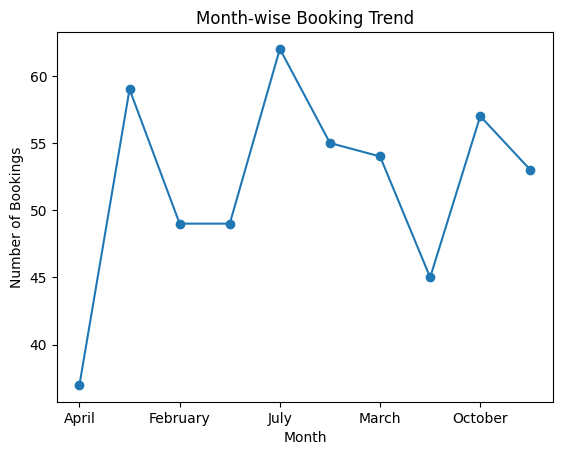

In [142]:
import matplotlib.pyplot as plt

month_wise_bookings.plot(kind="line", marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Month-wise Booking Trend")
plt.show()


In [143]:
#Peak Month and hishest sale

peak_month = month_wise_bookings.idxmax()
peak_count = month_wise_bookings.max()

print(f"Peak Booking Month: {peak_month}")
print(f"Total Bookings in Peak Month: {peak_count}")




Peak Booking Month: July
Total Bookings in Peak Month: 62


🔹 I. Outlier / Anomaly Detection

In [ ]:
#Ticket price above average

threshold = 3000
high_prices = passengers_data[passengers_data['TicketPrice'] > threshold]
print(high_prices[['PassengerID', 'TrainNo', 'Source', 'Destination', 'TicketPrice']])


     PassengerID  TrainNo   Source Destination  TicketPrice
2              3    12348  Lucknow       Patna         3277
4              5    12721   Mumbai       Delhi         3316
8              9    12146  Lucknow       Patna         3201
13            14    12500    Delhi      Mumbai         3454
21            22    12667     Pune       Delhi         3236
..           ...      ...      ...         ...          ...
477          478    12794   Jaipur    Varanasi         3103
483          484    12583    Patna        Pune         3206
494          495    12268   Mumbai     Chennai         3319
510          511    12109    Patna       Patna         3272
513          514    12973  Chennai    Varanasi         3253

[94 rows x 5 columns]


In [ ]:
#Only passengers with age above 75 or below 5

age_outliers = passengers_data[(passengers_data["Age"] < 5) | (passengers_data["Age"] > 75)]

print(age_outliers[[
    "PassengerID", "Name", "Age", "Gender",
    "TrainNo", "Source", "Destination"
]])



     PassengerID   Name  Age  Gender  TrainNo     Source Destination
23            24   Ravi   76  Female    12158   Varanasi     Lucknow
24            25   Amit   79  Female    12514       Pune       Patna
42            43   Ravi   79  Female    12476  Bangalore   Bangalore
85            86  Ankit   80  Female    12886      Patna   Bangalore
92            93   Ravi   77    Male    12174      Patna      Mumbai
95            96   Ravi   78  Female    12588    Lucknow     Lucknow
112          113  Sneha   79  Female    12390     Jaipur        Pune
130          131  Sneha   79  Female    12697     Jaipur      Jaipur
161          162  Rahul   78    Male    12542    Kolkata     Chennai
180          181  Pooja   76  Female    12773      Patna    Varanasi
182          183  Ankit   80  Female    12519       Pune        Pune
186          187  Priya   76  Female    12678  Bangalore        Pune
215          216   Ravi   76    Male    12397   Varanasi     Lucknow
227          228  Suman   77    Ma

🔹 J. Visualization (Minimum graphs)

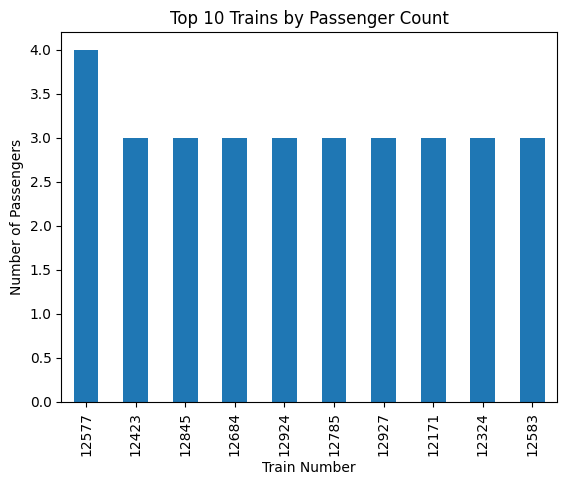

In [ ]:
#Graphical representation of Train-wise passengers

train_passengers = passengers_data["TrainNo"].value_counts().head(10)

plt.figure()
train_passengers.plot(kind="bar")
plt.xlabel("Train Number")
plt.ylabel("Number of Passengers")
plt.title("Top 10 Trains by Passenger Count")
plt.show()


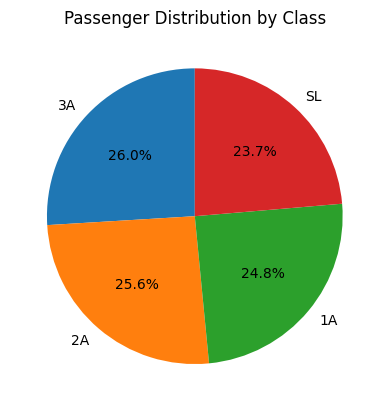

In [ ]:
#Graphical representation of Class distribution.

class_dist = passengers_data["Class"].value_counts()

plt.figure()
plt.pie(class_dist, labels=class_dist.index, autopct="%1.1f%%", startangle=90)
plt.title("Passenger Distribution by Class")
plt.show()


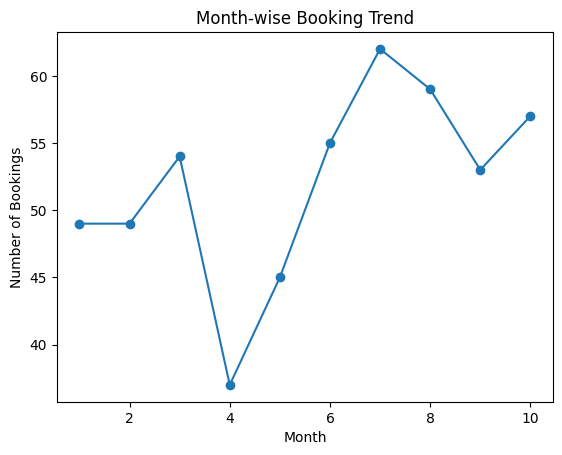

In [ ]:
#Graphical representation of Monthly bookings

passengers_data["BookingMonth"] = passengers_data["BookingDate"].dt.month
monthly_bookings = passengers_data["BookingMonth"].value_counts().sort_index()

plt.figure()
plt.plot(monthly_bookings.index, monthly_bookings.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Month-wise Booking Trend")
plt.show()


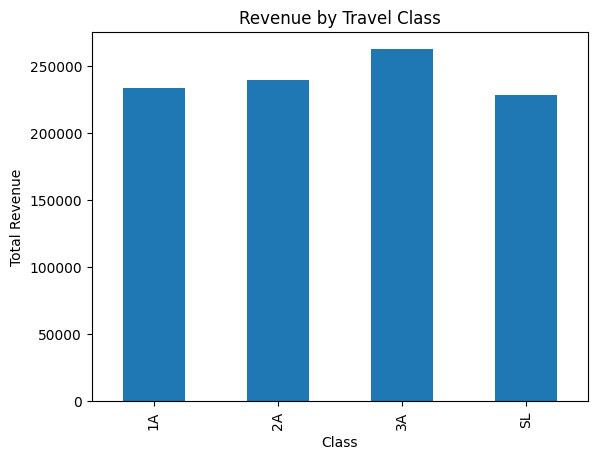

In [ ]:
#Graphical representation of Revenue by class.

class_revenue = passengers_data.groupby("Class")["TicketPrice"].sum()

plt.figure()
class_revenue.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Total Revenue")
plt.title("Revenue by Travel Class")
plt.show()


In [150]:
cleaned_data  = passengers_data.copy()

In [151]:
cleaned_data.to_csv("Cleaned_Data.csv", index=False)